In [47]:
import pandas as pd
import matplotlib.pyplot as plt

### Importing the data set and setting the column names


In [28]:
df=pd.read_csv("QueryResults.csv",names=["DATE","TAG","POSTS"],header=0)
df


,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,506
4,2008-08-01 00:00:00,c++,164
...,...,...,...
2309,2022-06-01 00:00:00,php,4205
2310,2022-06-01 00:00:00,python,23509
2311,2022-06-01 00:00:00,r,4582
2312,2022-06-01 00:00:00,ruby,496


### Determing the structure of the data set

In [29]:
df.shape

(2314, 3)

### Calculating how many number of post per tag

In [30]:
df.groupby("TAG").sum()

,POSTS
TAG,
assembly,40624
c,381341
c#,1544039
c++,768265
delphi,49728
go,62263
java,1850689
javascript,2389176
perl,66827


### Calculating how many number of post per tag

In [31]:
df.groupby("TAG").count()

,DATE,POSTS
TAG,,
assembly,167,167
c,167,167
c#,168,168
c++,167,167
delphi,167,167
go,152,152
java,167,167
javascript,167,167
perl,167,167


### Converting the str type of Date column to datetime type 

In [32]:
df.DATE=pd.to_datetime(df.DATE)
df

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,506
4,2008-08-01,c++,164
...,...,...,...
2309,2022-06-01,php,4205
2310,2022-06-01,python,23509
2311,2022-06-01,r,4582
2312,2022-06-01,ruby,496


### Pivoting the table setting date as row and Programming languages as columns

In [33]:
df=df.pivot(index="DATE",columns="TAG",values="POSTS")


TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,506.0,164.0,14.0,NaN,222.0,164.0,28.0,159.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,318.0,1647.0,753.0,104.0,NaN,1133.0,637.0,130.0,477.0,537.0,6.0,287.0,NaN
2008-10-01,15.0,303.0,1989.0,809.0,112.0,NaN,1150.0,724.0,127.0,612.0,508.0,NaN,247.0,NaN
2008-11-01,17.0,259.0,1732.0,734.0,141.0,NaN,957.0,581.0,97.0,502.0,452.0,1.0,159.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-01,225.0,1788.0,5824.0,3478.0,188.0,688.0,7268.0,15440.0,97.0,3718.0,22614.0,4338.0,456.0,1879.0
2022-03-01,253.0,2101.0,6477.0,3842.0,134.0,830.0,8110.0,16350.0,105.0,3768.0,24565.0,5085.0,528.0,2076.0
2022-04-01,265.0,1874.0,5955.0,3860.0,122.0,757.0,7866.0,16023.0,101.0,3825.0,23640.0,4780.0,494.0,1775.0


### Eliminating NaN values with 0

In [42]:
final_df=df.fillna(0)

### Checking if we got any NaN values left with

In [44]:
final_df.isna().values.any()

False

### Plotting the graph 

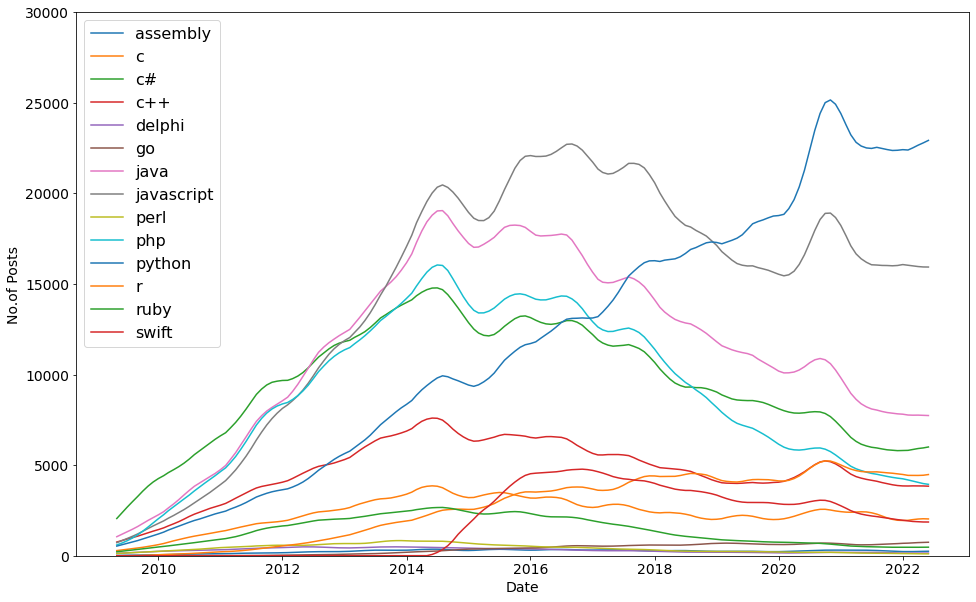

In [79]:
# using rolling and mean method
final_df = final_df.rolling(window=6).mean()
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date',fontsize=14)
plt.ylabel('No.of Posts',fontsize=14)
plt.ylim(0,30000)
# plotting all columns in df agains x axis using for loop
for column in final_df.columns:
    plt.plot(final_df.index,final_df[column],label=column)
plt.legend(fontsize=16)